The grammar is the same as before.

Now, we can ouput AST in bussproof style.

In [2]:
# url = 'https://raw.githubusercontent.com/jhjeong314/Proofmood/main'

# import httpimport
# with httpimport.remote_repo(url):
#   from arith7_parse import *

# If you get SSLCertVerificationError then try the following. 
# Of course, you should have arith_parse.py available locally.
from arith7_parse import *

def testParser(input_text, showOption='polish', showOperType=False):
  # showOption ::= 'polish' | 'RPN' | 'infix_latex' | 'tree'
  # showOperType has effect only when showOption == 'polish' or 'RPN'
  from IPython.display import display, Math

  try:
    ast = parse_text(input_text)
  except ValueError as e:
    print(f"ValueError: {e}")
  except SyntaxError as e:
    print(f"SyntaxError: {e}")
  else:
    if showOption=='polish':
      print(ast.build_polish_notation(showOperType))
    elif showOption=='RPN':
      print(ast.build_RPN(showOperType))
    elif showOption=='infix_latex':
      s = ast.build_infix_latex()
      # print(s) # latex source text
      display(Math(f"${s}$"))
    elif showOption=='tree':
      ast.draw_tree()
    else:
      raise ValueError(f"Invalid showOption: {showOption}")

In [3]:
input_text = "a + b * c - d"
print(f"Polish notation of {input_text}")
testParser(input_text, showOption='polish')
print(f"\nRPN of {input_text}")
testParser(input_text, showOption='RPN')

Polish notation of a + b * c - d
- + a * b c d

RPN of a + b * c - d
a b c * + d -


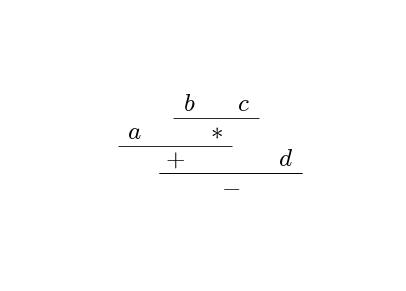

In [4]:
testParser(input_text, showOption='tree')

In [5]:
input_text1 = "(a) + f(sin(a),max(b, -a/b'! + 3), 12)"
print(f"\nRPN of {input_text1}")
testParser(input_text1, showOption='RPN')
print(f"\ninfix_latex of {input_text1}")
testParser(input_text1, showOption='infix_latex')


RPN of (a) + f(sin(a),max(b, -a/b'! + 3), 12)
a a sin b a b ' ! / - 3 + max 12 f +

infix_latex of (a) + f(sin(a),max(b, -a/b'! + 3), 12)


<IPython.core.display.Math object>

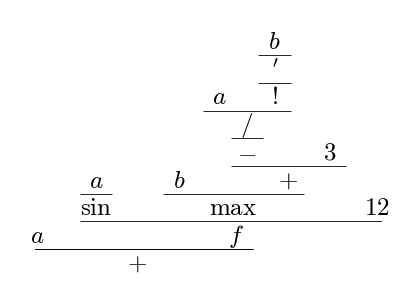

In [6]:
testParser(input_text1, showOption='tree')

<IPython.core.display.Math object>

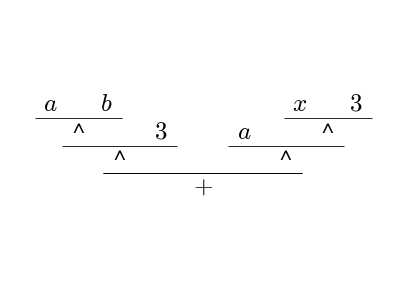

In [7]:
input_text1 = "(a^b)^3 + a^x^3"
testParser(input_text1, showOption='infix_latex')
testParser(input_text1, showOption='tree')

In [8]:
s1 = '-x + y'
testParser(s1)
testParser(s1, showOption='infix_latex')

+ - x y


<IPython.core.display.Math object>

In [9]:
s2 = "-x + (-(y+x))" 
testParser(s2)
testParser(s2, showOption='infix_latex')


+ - x - + y x


<IPython.core.display.Math object>